Correlating stock returns using Python
https://www.interviewqs.com/blog/py-stock-correlation

In [2]:

import pandas as pd
import numpy as np
#used to grab the stock prices, with yahoo
from datetime import datetime, timedelta
import pandas_datareader as web
#to visualize the results
import matplotlib.pyplot as plt
import seaborn

start = (datetime.today()-timedelta(days=90))
symbols_list = ['SPY', 'IWM', 'EFA', 'AGG']

In [3]:
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list:
    r = web.DataReader(ticker, 'yahoo', start)
    r['Symbol'] = ticker
    symbols.append(r)

#concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

,Date,Close,Symbol
0,2021-05-24,419.170013,SPY
1,2021-05-25,418.239990,SPY
2,2021-05-26,419.070007,SPY
3,2021-05-27,419.290009,SPY
4,2021-05-28,420.040009,SPY


In [4]:
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

Symbol,Date,AGG,EFA,IWM,SPY
0,2021-05-24,114.449997,80.519997,221.399994,419.170013
1,2021-05-25,114.730003,80.540001,219.259995,418.239990
2,2021-05-26,114.690002,80.489998,223.350006,419.070007
3,2021-05-27,114.550003,80.639999,225.649994,419.290009
4,2021-05-28,114.550003,80.830002,225.500000,420.040009


In [5]:
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.index.name = None
corr_df.head()

Symbol,AGG,EFA,IWM,SPY
AGG,1.000000,-0.540697,-0.694464,0.778774
EFA,-0.540697,1.000000,0.466669,-0.154520
IWM,-0.694464,0.466669,1.000000,-0.538776
SPY,0.778774,-0.154520,-0.538776,1.000000


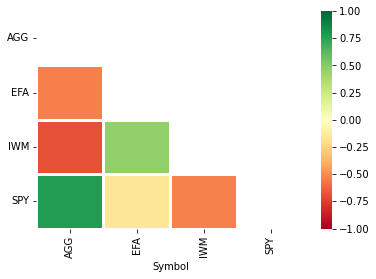

In [6]:
#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()